# <font color="darkblue"> Prática 02: Algoritmo k-NN </font>

**Objetivos:**


*   Aplicar o algoritmo k-NN a um problema prático.
*   Apresentar as funções do Scikit-Learn que lidam com o k-NN.



**Descrição:**

Implemente duas versões de um classificador usando o algoritmo k-NN que identifica dígitos escritos à mão a partir de um conjunto de imagens. Utilize o dataset <i> Digits </i> da biblioteca Scikit-Learn. Na primeira versão, você implementará o algoritmo de classificação do zero, enquanto que na segunda você deverá utilizar a biblioteca Scikit-Learn para realizar a classificação. Ao final, compare as acurácias obtidas e o tempo de execução de cada versão.

# <font color="darkblue"> Solução </font>

### Descrição do Dataset

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

digits = load_digits()

# Conhecendo dataset 
print(digits.DESCR + "\n\n")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Exibição das imagens

opa
opa
opa
opa


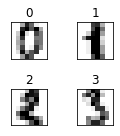

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(2, 2))

for item in zip(axes.ravel(), digits.images, digits.target):
    print("opa")
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([])  
    axes.set_title(target)
    
# usado para um numero nao ficar em cima do outro        
plt.tight_layout() 

### Implementação do classificador

In [ ]:
# primeira versão
import statistics
x = digits.data
y = digits.target
print(x.shape)
print(y.shape)

def distancia (imagem, x, p): 
  lista = list()
  for i in x :
    lista.append((sum(i - imagem) **p) ** 1/p)
  return lista
  
def knn (imagem, k=3, p=10):
  distancias = distancia(imagem, x, p)
  std = np.argsort(distancias)[:k]

  l = list()
                  
  for i in std: 
    l.append(y[i])
  return statistics.mode(l)

print(knn(x[-1]))

print(y[-1])


(1797, 64)
(1797,)
8
8


In [5]:
#segunda versão
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

digitos = load_digits()

x_treino, x_teste, y_treino, y_teste = train_test_split(digitos.data, digitos.target, test_size=0.2, random_state=42)

classificador = KNeighborsClassifier(n_neighbors=5)

classificador.fit(x_treino, y_treino)

y_predito = classificador.predict(x_teste)

acuracia = accuracy_score(y_teste, y_predito)

print(f"A acurácia é de {acuracia*100:.2f}%")

A acurácia é de 98.61%
